In [6]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [65]:
Year = "2021"
Month = "06"
Day = "22"
BeadNumber = 1
folder = r"/home/data_transfer/data_from_windows/"+ Year + Month + Day

In [66]:
Data_File_Number=0
# fname = folder+"/Data%d.h5" % Data_File_Number
# fname = folder+"/bead"+str(BeadNumber)+"/Neutrality2/Relaxation_20210708/200V"+"/Discharge_%d.h5" % Data_File_Number
fname = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Data_File_Number

In [67]:
BDF = BeadDataFile.BeadDataFile(fname)


No seismometer data
No z_set data
No height data
No electrodes data
No cantilever data
No laser power data


In [68]:
BDF.xyz[0]

array([-124390909, -113874657, -103899252, ..., -116822833, -116289068,
       -112500648], dtype=int32)

In [69]:
113874657/2574116

44.23835483715575

(-1.1, 1.1)

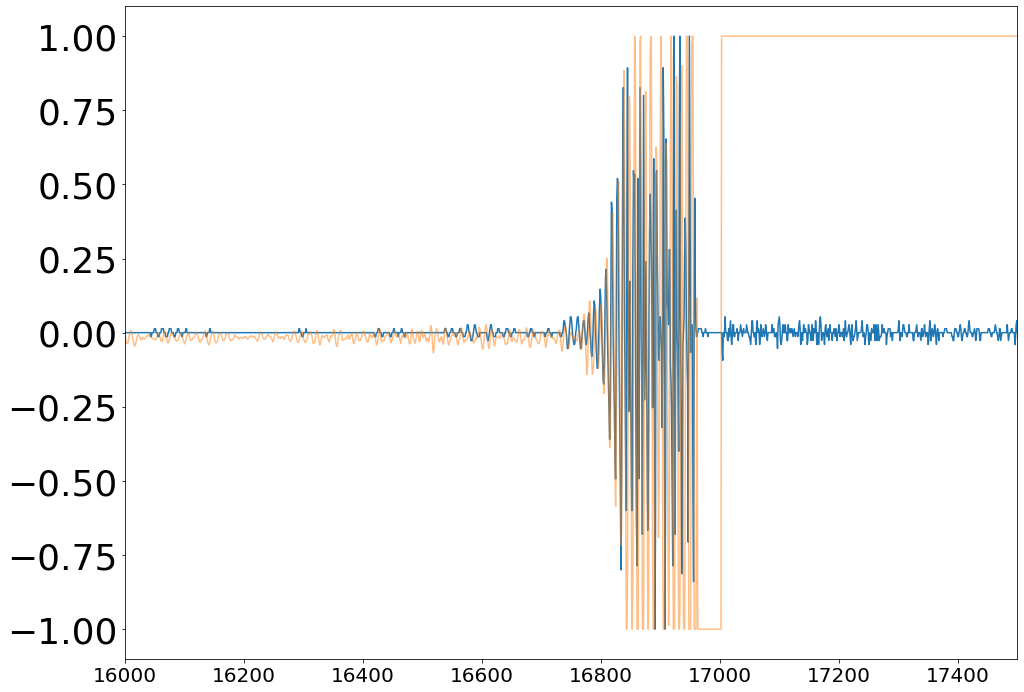

In [49]:
plt.plot((BDF.feedback[0]-1000)/75)
plt.plot(BDF.feedback[2]/3200,alpha=0.5)

#plt.plot(BDF.xyz[2]/1e4)
plt.xlim(16000,17500)
plt.ylim(-1.1,1.1)